In [1]:
library(ggplot2)
library(olsrr)
library(eurostat)
options(width=160, repr.plot.width=11, repr.plot.height=7) 


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




# Úkoly

V rámci cvičení provedeme regresní analýzu datasetu "Population on 1 January by age, sex and broad group of citizenship". Tento dataset je k dispozici na serveru Eurostatu, přistupovat k němu lze např. na WWW: 

https://ec.europa.eu/eurostat/databrowser/view/migr_pop2ctz/default/table?lang=en

My se zaměříme konkrétně na Švédsko a budeme modelovat počet obyvatel v kategoriích "muži" a "ženy".

## Úkol 1.a: Příprava dat

Nejprve je třeba připravit data podle následujícího popisu.

**Data pro analýzu:**
- identifikátor datasetu: `migr_pop2ctz`
- NUTS: Švédsko (`SE`)
- věková kategorie - *age*: `TOTAL`
- státní příslušnost - *citizen*: `TOTAL`
- jednotky - *unit*: `NR`
- datum - *time*: vše
- pohlaví - *sex*: `M` a `F`

Tentokrát už nebudeme mazat všechny sloupce, stačí, když budeme mít podstatné řádky.

In [2]:
code <- "migr_pop2ctz"
data <- get_eurostat(code)

Table migr_pop2ctz cached at /tmp/RtmpAW8iwP/eurostat/migr_pop2ctz_date_code_FF.rds



In [3]:
head(data)

age,citizen,unit,sex,geo,time,values
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
TOTAL,FOR_STLS,NR,F,BE,2022-01-01,729954
TOTAL,FOR_STLS,NR,F,BG,2022-01-01,60237
TOTAL,FOR_STLS,NR,F,CH,2022-01-01,1059781
TOTAL,FOR_STLS,NR,F,CY,2022-01-01,92659
TOTAL,FOR_STLS,NR,F,CZ,2022-01-01,240293
TOTAL,FOR_STLS,NR,F,DE,2022-01-01,5171053


In [4]:
df <- data[data$age == "TOTAL",]
df <- df[df$citizen == "TOTAL",]
df <- df[df$geo == "SE",]
df <- df[df$sex %in% c("M", "F"),]
df$sex <- factor(df$sex)

In [5]:
head(df)

age,citizen,unit,sex,geo,time,values
<chr>,<chr>,<chr>,<fct>,<chr>,<date>,<dbl>
TOTAL,TOTAL,NR,F,SE,2022-01-01,5191619
TOTAL,TOTAL,NR,M,SE,2022-01-01,5260707
TOTAL,TOTAL,NR,F,SE,2021-01-01,5156448
TOTAL,TOTAL,NR,M,SE,2021-01-01,5222847
TOTAL,TOTAL,NR,F,SE,2020-01-01,5131775
TOTAL,TOTAL,NR,M,SE,2020-01-01,5195814


## Úkol 1.b: Příprava dat - pokr.

Datum označující rok v podobě `<date>` bude dělat později problémy, proto jej potřebujeme transformovat na číslo. Nápověda: `as.numeric()` a `format()`.

In [6]:
df$time <- as.numeric(format(df$time,'%Y'))

## Úkol 1.c: Vykreslení dat, diskuse

Vykreslete data, např. pomocí `ggplot()` a diskutujte nad jejich vlastnostmi. Jaké modely se jeví jako potenciálně vhodné?

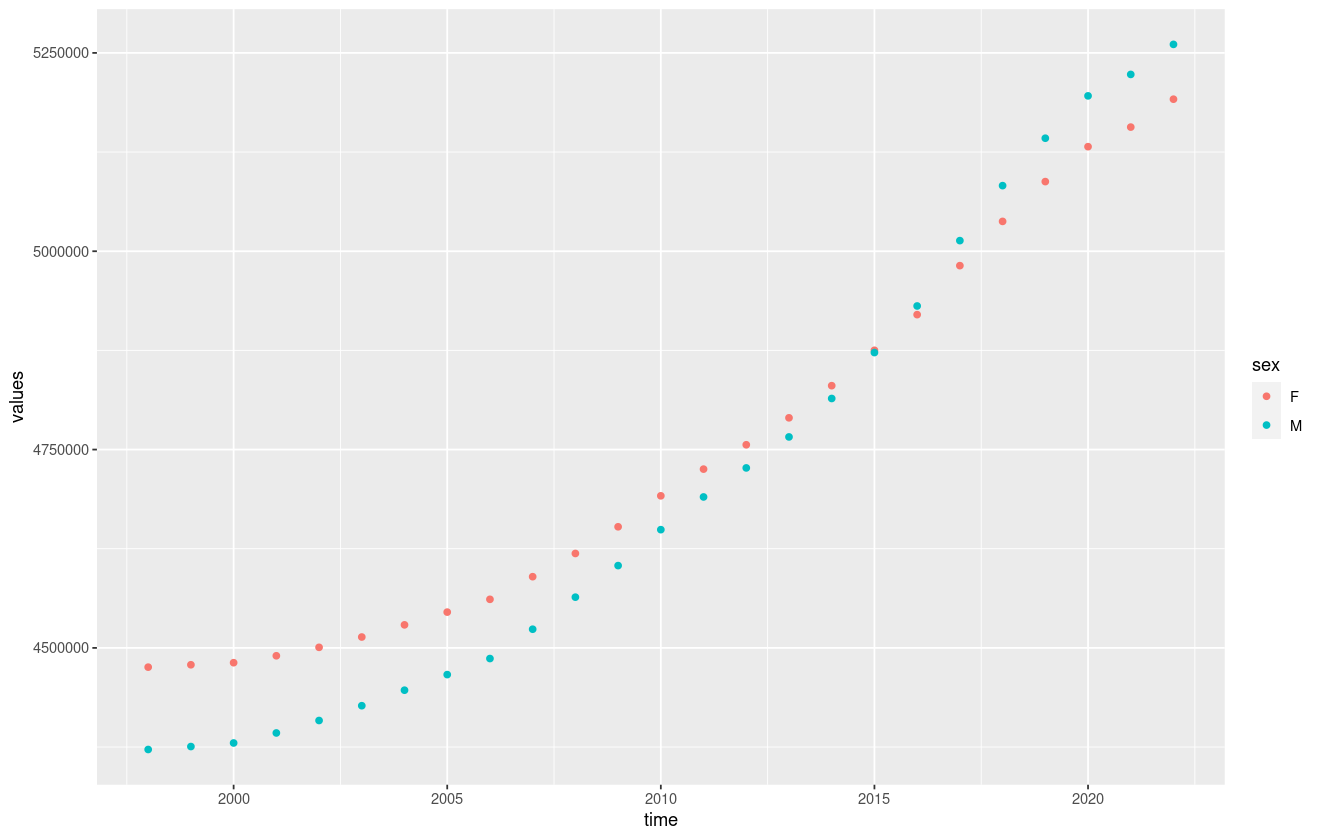

In [7]:
ggplot(df, aes(x=time, y=values, color=sex)) +
    geom_point()

<font color="blue">**Nyní zpět k výkladu.**</font>

---

## Úkol 2.a: Jeden společný model

První model, který zkusíme, bude společný pro obě kategorické proměnné. Vaším úkolem je:
- model navrhnout a odhadnout jeho parametry
- diskutovat o výsledcích odhadu
- vykreslit data, predikci modelu a potenciálně i predikční interval.

In [8]:
fit.common = lm(formula=values~time+I(time^2), data=df)
summary(fit.common)


Call:
lm(formula = values ~ time + I(time^2), data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-80539 -31971   1658  26163  64748 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.896e+09  4.635e+08   10.56 5.28e-14 ***
time        -4.903e+06  4.612e+05  -10.63 4.27e-14 ***
I(time^2)    1.229e+03  1.147e+02   10.71 3.34e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37640 on 47 degrees of freedom
Multiple R-squared:  0.9814,	Adjusted R-squared:  0.9806 
F-statistic:  1239 on 2 and 47 DF,  p-value: < 2.2e-16


Warning message in predict.lm(fit.common, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


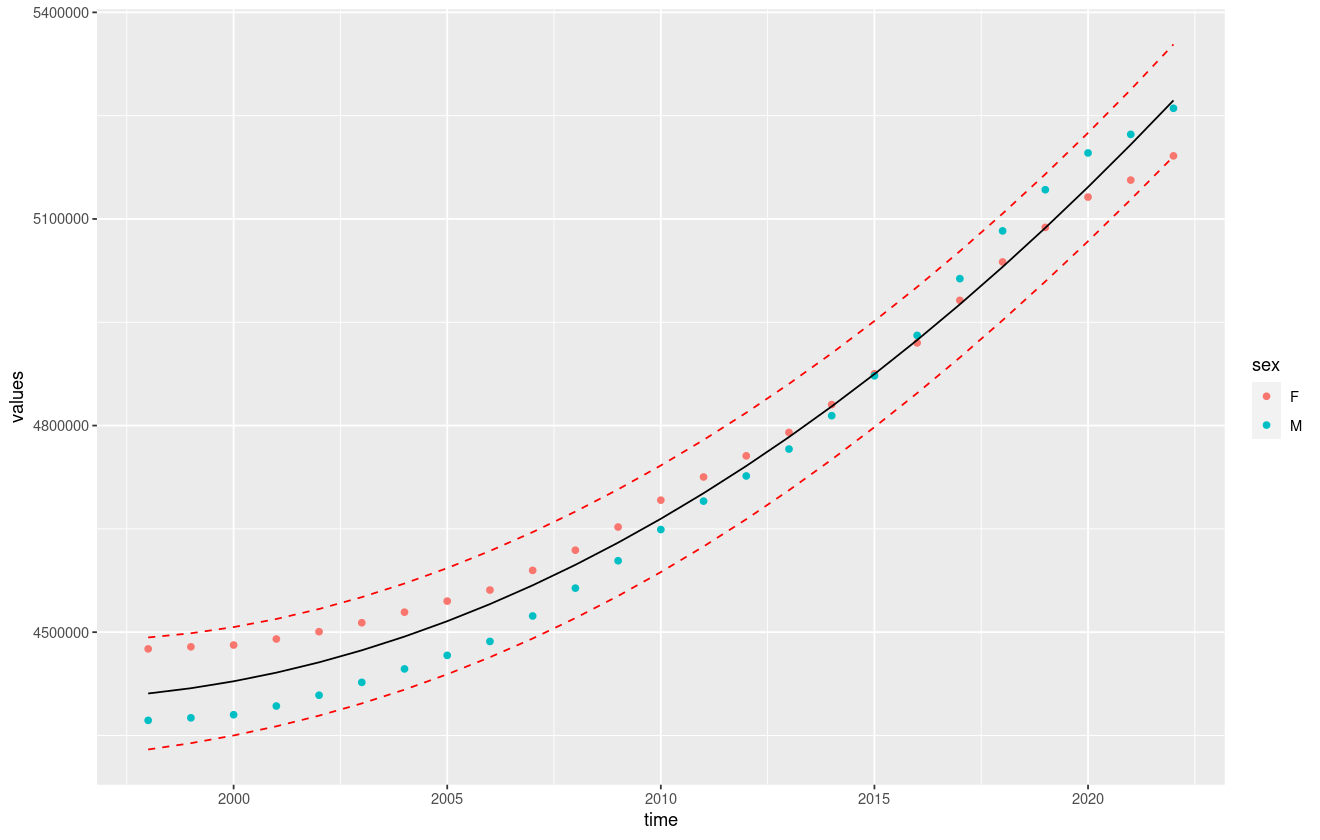

In [9]:
tmp <- predict(fit.common, interval="prediction")
df.common <- cbind(df, tmp)
ggplot(df.common, aes(x=time, y=values, color=sex)) +
    geom_point() +
    geom_line(aes(y=fit), color="black") +
    geom_line(aes(y=lwr), color="red", linetype="dashed") +
    geom_line(aes(y=upr), color="red", linetype="dashed")

<font color="blue">**Nyní zpět k výkladu.**</font>

---

## Úkol 3.a: Model s faktorem

Vaším úkolem je navrhnout nejprve jednoduchý model s faktorovou proměnnou tak, aby bylo zohledněno pouze posunutí. Diskutujte o modelu, odhadech a vykreslete data vč. predikcí.

In [10]:
fit.intercept <- lm(formula = values~time+I(time^2)+sex, data=df)
summary(fit.intercept)


Call:
lm(formula = values ~ time + I(time^2) + sex, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-96508 -22333    911  17963  71300 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.896e+09  4.212e+08  11.624 2.75e-15 ***
time        -4.903e+06  4.191e+05 -11.698 2.21e-15 ***
I(time^2)    1.229e+03  1.043e+02  11.784 1.71e-15 ***
sexM        -3.194e+04  9.675e+03  -3.301  0.00187 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 34210 on 46 degrees of freedom
Multiple R-squared:  0.985,	Adjusted R-squared:  0.984 
F-statistic:  1004 on 3 and 46 DF,  p-value: < 2.2e-16


Warning message in predict.lm(fit.intercept, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


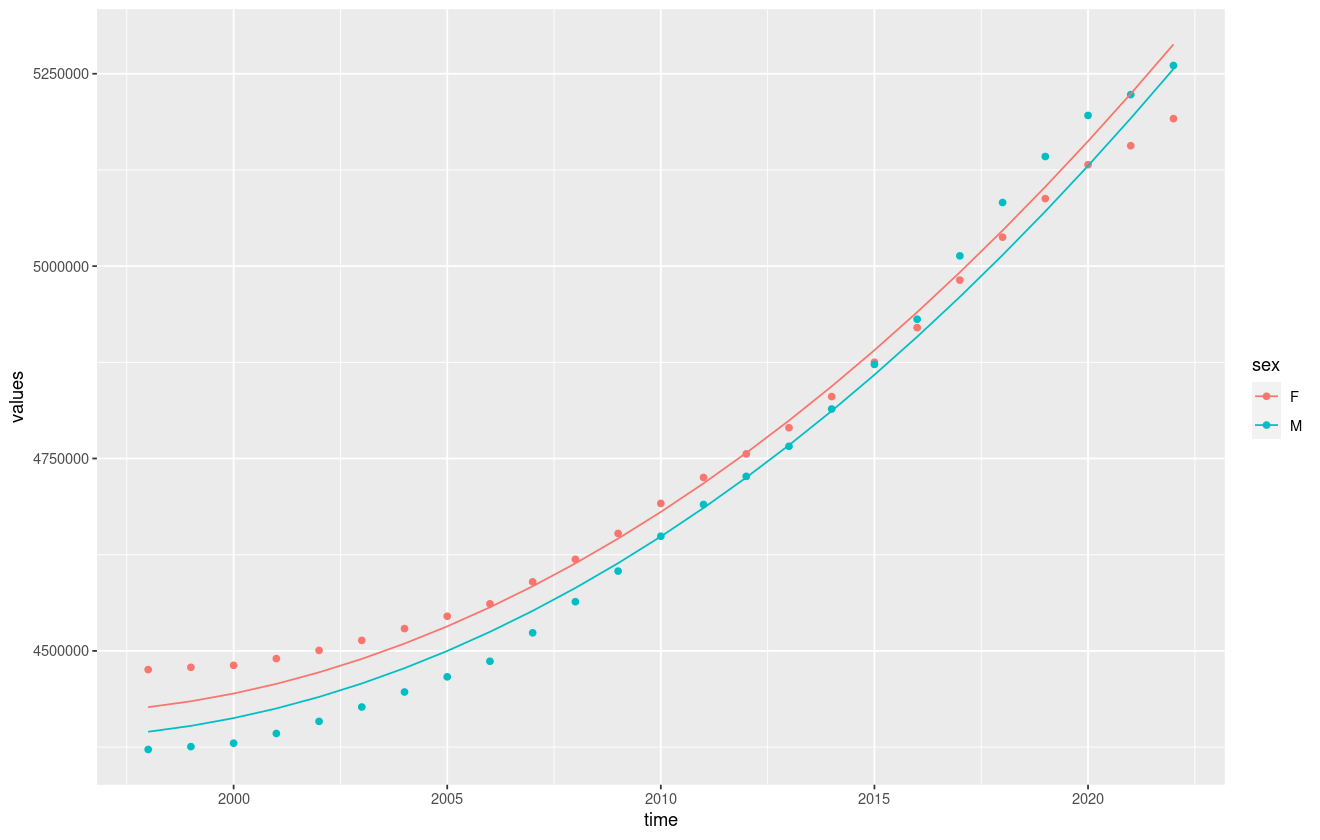

In [11]:
tmp <- predict(fit.intercept, interval="prediction")
df.intercept <- cbind(df, tmp)
ggplot(df.intercept, aes(x=time, y=values, group=sex, color=sex)) +
    geom_point() +
    geom_line(aes(y=fit))

<font color="blue">**Nyní zpět k výkladu.**</font>

---

## Úkol 3.b: Interakce

Nyní zkusíme model s interakcemi mezi stávajícími regresory a kategorickou proměnnou. Podobně jako výše model navrhněte, odhadněte jeho parametry, analyzujte výsledky a vykreslete data s predikcemi.

In [12]:
fit.all <- lm(formula = values~time+I(time^2)+sex+time:sex+I(time^2):sex, data=df)
summary(fit.all)


Call:
lm(formula = values ~ time + I(time^2) + sex + time:sex + I(time^2):sex, 
    data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-52961  -7446   -911   6141  35430 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.457e+09  2.889e+08  15.431   <2e-16 ***
time           -4.463e+06  2.874e+05 -15.526   <2e-16 ***
I(time^2)       1.118e+03  7.150e+01  15.637   <2e-16 ***
sexM            8.776e+08  4.085e+08   2.148   0.0372 *  
time:sexM      -8.812e+05  4.065e+05  -2.168   0.0356 *  
I(time^2):sexM  2.212e+02  1.011e+02   2.187   0.0341 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16590 on 44 degrees of freedom
Multiple R-squared:  0.9966,	Adjusted R-squared:  0.9962 
F-statistic:  2591 on 5 and 44 DF,  p-value: < 2.2e-16


In [13]:
fit.all2 <- lm(formula=values~(time + I(time^2))*sex, data=df)
summary(fit.all2)


Call:
lm(formula = values ~ (time + I(time^2)) * sex, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-52961  -7446   -911   6141  35430 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.457e+09  2.889e+08  15.431   <2e-16 ***
time           -4.463e+06  2.874e+05 -15.526   <2e-16 ***
I(time^2)       1.118e+03  7.150e+01  15.637   <2e-16 ***
sexM            8.776e+08  4.085e+08   2.148   0.0372 *  
time:sexM      -8.812e+05  4.065e+05  -2.168   0.0356 *  
I(time^2):sexM  2.212e+02  1.011e+02   2.187   0.0341 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16590 on 44 degrees of freedom
Multiple R-squared:  0.9966,	Adjusted R-squared:  0.9962 
F-statistic:  2591 on 5 and 44 DF,  p-value: < 2.2e-16


Warning message in predict.lm(fit.all, interval = "prediction"):
“predictions on current data refer to _future_ responses
”


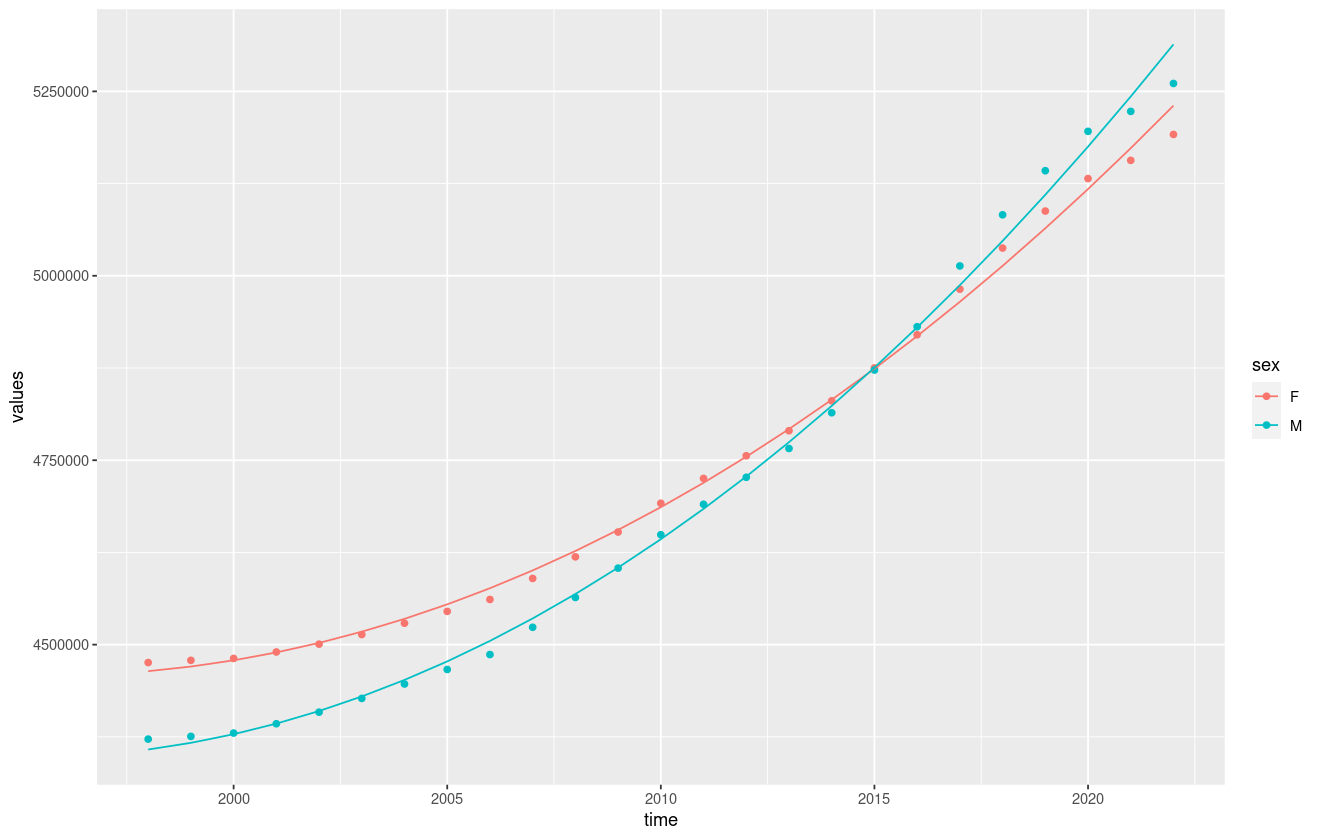

In [14]:
tmp <- predict(fit.all, interval="prediction")
df.all <- cbind(df, tmp)
ggplot(df.all, aes(x=time, y=values, group=sex, color=sex)) +
    geom_point() +
    geom_line(aes(y=fit))

<font color="blue">**Nyní zpět k výkladu.**</font>

---

## Úkol 4.a: Analýza vlastností vybraného modelu

1. Vyberte některý z navržených modelů a zdůvodněte svou volbu.
2. Proveďte analýzu reziduí (viz minulé cvičení).
3. Navrhněte případné úpravy dat či modelu.

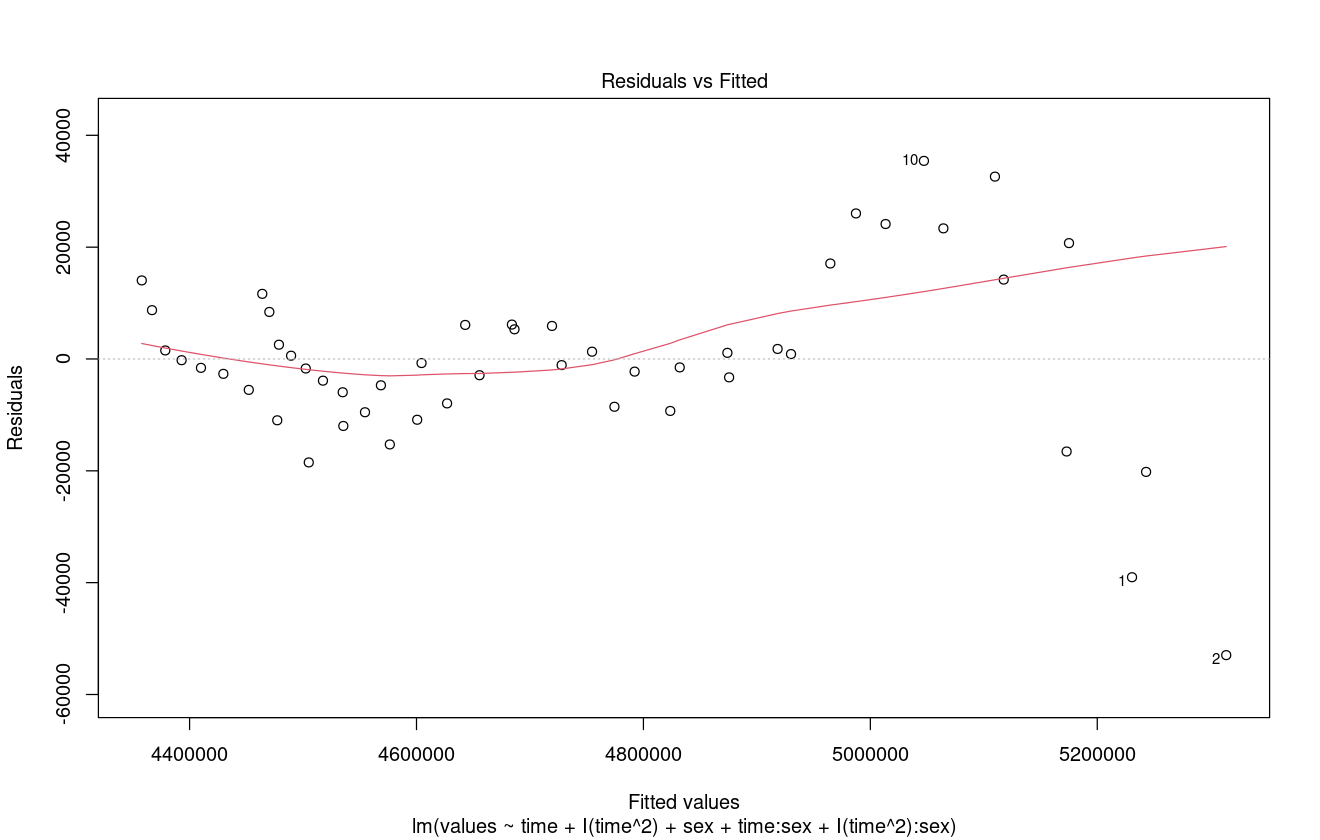

In [15]:
plot(fit.all, which=1)

In [16]:
ols_test_correlation(fit.all)

[1] 0.9644115

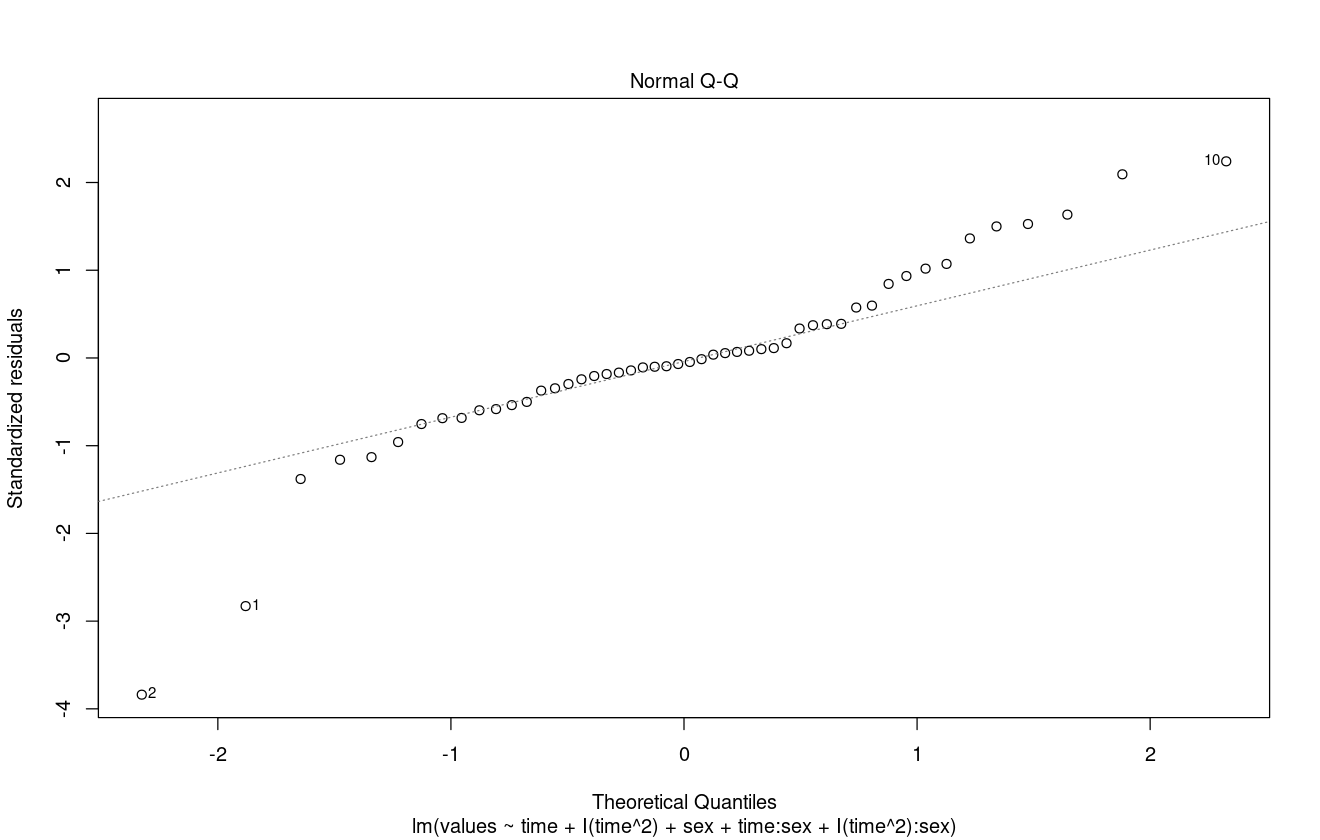

In [17]:
plot(fit.all, which=2)

In [18]:
ols_test_normality(fit.all)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9402         0.0138 
Kolmogorov-Smirnov        0.1155         0.4824 
Cramer-von Mises          4.2467         0.0000 
Anderson-Darling          0.996          0.0115 
-----------------------------------------------

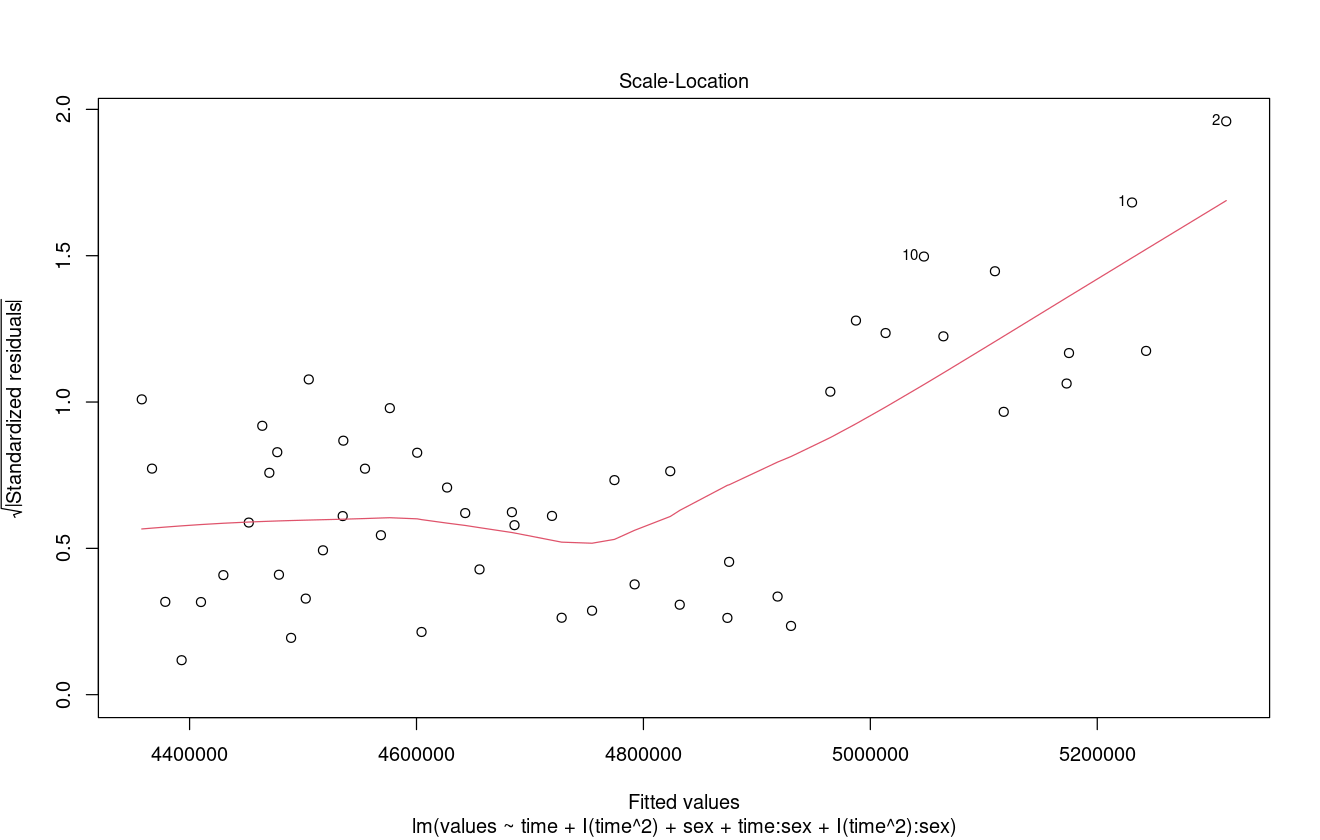

In [19]:
plot(fit.all, which=3)

In [20]:
ols_test_breusch_pagan(fit.all)


 Breusch Pagan Test for Heteroskedasticity
 -----------------------------------------
 Ho: the variance is constant            
 Ha: the variance is not constant        

               Data                
 ----------------------------------
 Response : values 
 Variables: fitted values of values 

         Test Summary           
 -------------------------------
 DF            =    1 
 Chi2          =    38.75013 
 Prob > Chi2   =    4.816793e-10 

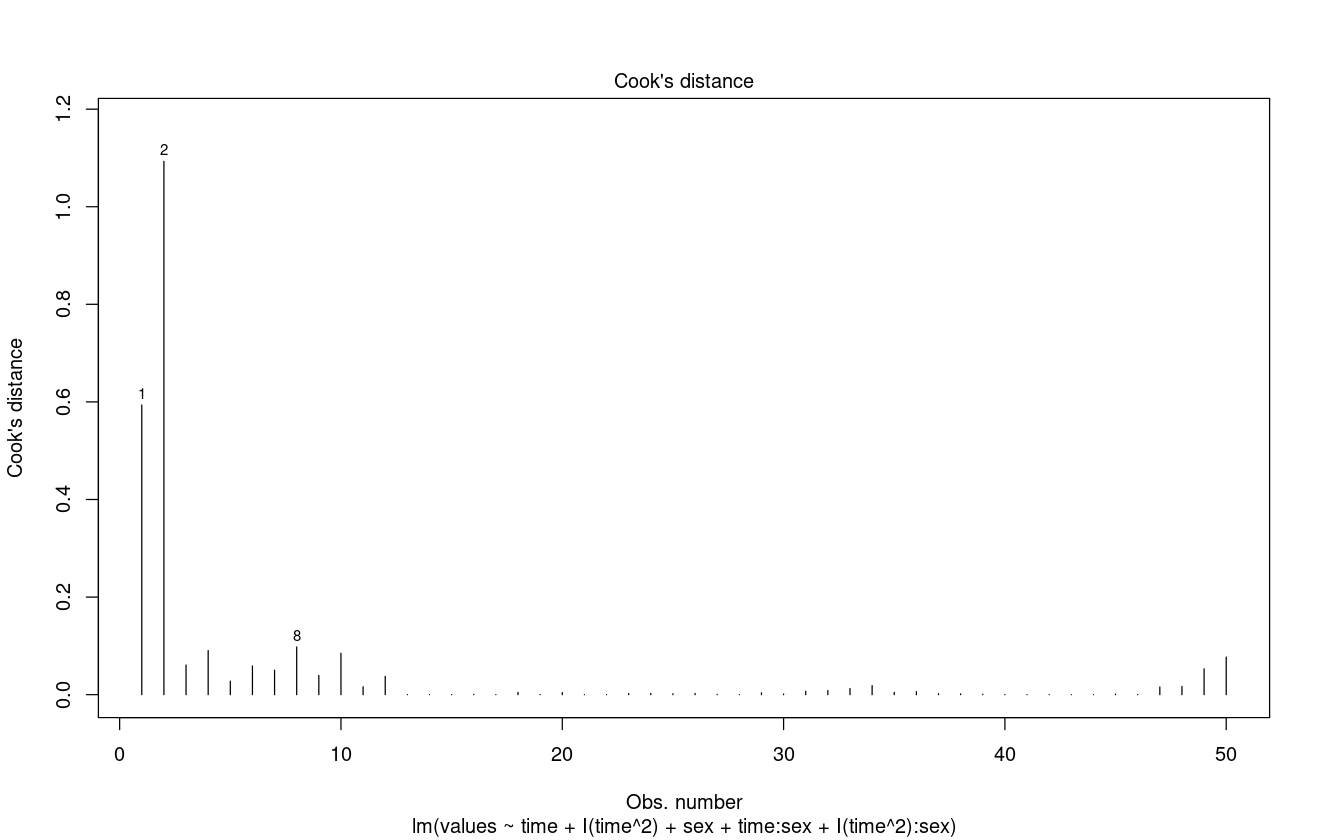

In [21]:
plot(fit.all, which=4)

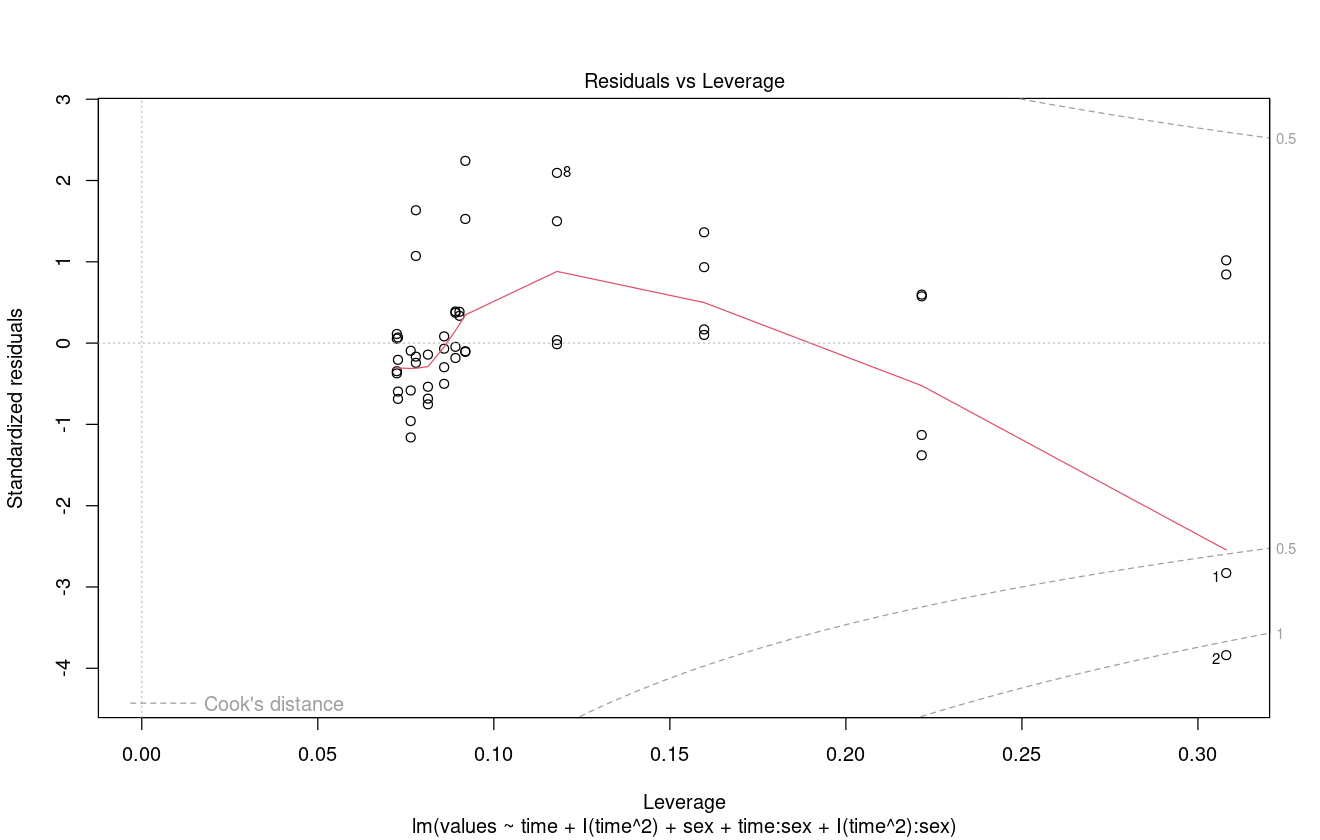

In [22]:
plot(fit.all, which=5)

In [23]:
ols_test_outlier(fit.all)

,studentized_residual,unadjusted_p_val,bonferroni_p_val
,<dbl>,<dbl>,<dbl>
2,-4.652462,3.131842e-05,0.001565921


---

---